In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import six


sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})


import anchor


from anchor import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR, MODALITY_TO_CMAP

%load_ext autoreload
%autoreload 2

# Figures in the notebook
%matplotlib inline

# Set random seed
np.random.seed(sum(map(ord, 'anchor')))



# Define folder to save figures
folder = 'pdf'
!mkdir -p $folder


/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


In [48]:
dataset_name_to_folder = {'Perfect Modalities': '../S05._Supplementary_Figure5',
                          'Maybe Bimodals': '../S06._Supplementary_Figure6'}

datatypes = 'data', 'metadata'
datasets = {name: {datatype: pd.read_csv('{}/{}.csv'.format(folder, datatype), index_col=0) 
              for datatype in datatypes} for name, folder in dataset_name_to_folder.items()}


In [49]:
def name_to_filename(name):
    return name.lower().replace(' ', '_')

for name in datasets:
    dataset_folder = '{}/{}'.format(folder, name_to_filename(name))
    ! mkdir $dataset_folder

mkdir: cannot create directory `pdf/perfect_modalities': File exists
mkdir: cannot create directory `pdf/maybe_bimodals': File exists


In [50]:
from sklearn.mixture import GMM

for name, datas in datasets.items():
    six.print_(name)
    data = datas['data']
    metadata = datas['metadata']
    
    dataset_folder = '{}/{}'.format(folder, name_to_filename(name))
    gmm = GMM(n_components=2)
    gmm.fit(data)
    means = pd.DataFrame(gmm.means_, columns=data.columns)
    means.head()

    covars = pd.DataFrame(gmm.covars_, columns=data.columns)
    covars.head()

    weights = pd.Series(gmm.weights_)
    weights.head()

    proportions = weights.mean()
    standardized_distance = np.abs(means.loc[0] - means.loc[1])/covars.mean()

    bimodality_index = np.sqrt(proportions * (1-proportions)) * standardized_distance
    bimodality_index.name = "Bimodality Index"
    
    # Add annotation of original modality and noise percentages
    bimodality_index = metadata.join(bimodality_index)
    
    # Add column for when this method predicted bimodality
    bimodality_index['Predicted Bimodal'] = bimodality_index['Bimodality Index'] > 10
    
    g = sns.factorplot(x='% Noise', 
                   y='Bimodality Index', 
               hue='Modality', 
               data=bimodality_with_bayesian, kind='point', #col_wrap=2, 
               hue_order=MODALITY_ORDER, size=3, scale=0.5, dodge=True,
               palette=MODALITY_PALETTE, aspect=1.25, legend=False)
    g.set(title=name)
    g.savefig('{}/bimodality_index_with_noise.pdf'.format(dataset_folder))
    
    g = sns.factorplot(x='% Noise', y='Predicted Bimodal', data=bimodality_index, 
                   scale=0.5, size=3, aspect=1.5, hue='Modality', 
                   palette=MODALITY_PALETTE[:-1], hue_order=MODALITY_ORDER[:-1])
    g.set(title=name)
    for ax in g.axes.flat:
        ax.set(ylim=(0, 1), ylabel='% Predicted Bimodal')
        ax.set(yticklabels=[int(100*tick) for tick in ax.get_yticks()])

    g.savefig('{}/bimodality_index_predicted_bimodal.pdf'.format(dataset_folder))

Perfect Modalities


ValueError: Could not interpret input 'Modality'

In [44]:
bimodality_index['Predicted Bimodal'] = bimodality_index['Bimodality Index'] > 10

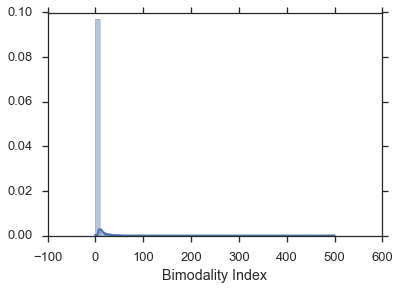

In [42]:
sns.distplot(bimodality_index['Bimodality Index'])

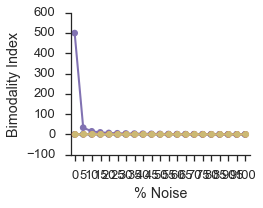

In [25]:
g = sns.factorplot(x='% Noise', 
                   y='Bimodality Index', 
               hue='Original Modality', 
               data=bimodality_with_bayesian, kind='point', #col_wrap=2, 
               hue_order=MODALITY_ORDER, size=3, scale=0.5, dodge=True,
               palette=MODALITY_PALETTE, aspect=1.25, legend=False)
g.savefig('{}/bimodality_index_with_noise.pdf'.format(dataset_folder))
# for ax in g.axes.flat:
#     ax.set(xticks=np.arange(0, 110, 10))